In [53]:
import pandas as pd

In [54]:
df = pd.read_csv('./data/subway_202101.csv', thousands=',')
df

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2021-01,1호선,1,서울역,731660,678117,127534,118937,2021-02-03 09:49:34
1,2021-01,1호선,10,동묘앞,98645,105308,113919,115644,2021-02-03 09:49:34
2,2021-01,1호선,2,시청,371942,366139,46231,43433,2021-02-03 09:49:34
3,2021-01,1호선,3,종각,598363,567563,84544,78565,2021-02-03 09:49:34
4,2021-01,1호선,4,종로3가,313943,281737,187603,175431,2021-02-03 09:49:34
...,...,...,...,...,...,...,...,...,...
599,2021-01,우이신설선,705,북한산보국문,99921,97636,28310,29192,2021-02-03 09:49:34
600,2021-01,우이신설선,706,정릉,67390,63786,30469,29394,2021-02-03 09:49:34
601,2021-01,우이신설선,707,성신여대입구(돈암),50177,58328,19635,18769,2021-02-03 09:49:34
602,2021-01,우이신설선,708,보문,22999,23078,10301,10532,2021-02-03 09:49:34


In [55]:
df['무임승차비율'] = df['무임승차'] / (df['무임승차'] + df['유임승차'])

In [56]:
df[df['무임승차비율'] == df['무임승차비율'].max()].iloc[0,4:8]

유임승차    21105
유임하차    16051
무임승차    38785
무임하차    35334
Name: 208, dtype: object

In [57]:
station = df[df['무임승차비율'] == df['무임승차비율'].max()]
유임승차 = station['유임승차']
유임하차 = station['유임하차']
무임승차 = station['무임승차']
무임하차 = station['무임하차']
total = df[
    df['무임승차비율'] == df['무임승차비율'].max()
].iloc[0, 4:8].sum(axis=0)
print(total)

111275


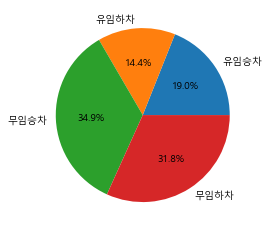

In [58]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.pie(
    [
        유임승차.sum() / total * 100, 유임하차.sum()/total* 100,
        무임승차.sum() / total * 100, 무임하차.sum()/total* 100
    ],
    labels=['유임승차', '유임하차', '무임승차', '무임하차'],
    autopct='%.1f%%')
plt.show()

In [62]:
colums = pd.read_csv('./data/subway_2_202101.csv').columns

In [68]:
df2 = pd.read_csv('./data/subway_2_202101.csv', thousands=',', skiprows=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 53 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   604 non-null    object
 1   Unnamed: 1   604 non-null    object
 2   Unnamed: 2   604 non-null    int64 
 3   Unnamed: 3   604 non-null    object
 4   승차           604 non-null    int64 
 5   하차           604 non-null    int64 
 6   승차.1         604 non-null    int64 
 7   하차.1         604 non-null    int64 
 8   승차.2         604 non-null    int64 
 9   하차.2         604 non-null    int64 
 10  승차.3         604 non-null    int64 
 11  하차.3         604 non-null    int64 
 12  승차.4         604 non-null    int64 
 13  하차.4         604 non-null    int64 
 14  승차.5         604 non-null    int64 
 15  하차.5         604 non-null    int64 
 16  승차.6         604 non-null    int64 
 17  하차.6         604 non-null    int64 
 18  승차.7         604 non-null    int64 
 19  하차.7         604 non-null    

In [72]:
df2.columns = colums
df2.head()

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,2021-01,1호선,1,서울역,445,8,6832,4781,8835,24937,...,3751,32,398,0,2,0,0,0,0,2021-02-03 09:49:40
1,2021-01,1호선,10,동묘앞,78,2,2391,738,2761,3527,...,1502,1,704,0,8,0,0,0,0,2021-02-03 09:49:40
2,2021-01,1호선,2,시청,18,1,1489,2990,2235,14570,...,629,4,48,0,1,0,0,0,0,2021-02-03 09:49:40
3,2021-01,1호선,3,종각,113,1,1852,3464,2578,18288,...,785,10,100,1,1,0,0,0,0,2021-02-03 09:49:40
4,2021-01,1호선,4,종로3가,109,4,2187,2427,2374,8473,...,1104,7,194,0,3,0,0,0,0,2021-02-03 09:49:40


In [74]:
df3 = df2.iloc[:, [3,10,11,12,13,14,15,16,17]]
df3

,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17
0,서울역,27116,66431,43277,145325,31927,91672,29589,44874
1,동묘앞,4457,5734,6977,14687,5588,13409,6386,14013
2,시청,4971,47793,6119,131340,6335,62133,7012,23760
3,종각,4413,77560,6631,165202,7997,100421,10911,42055
4,종로3가,3297,18316,5367,52803,7144,54311,13136,42285
...,...,...,...,...,...,...,...,...,...
599,북한산보국문,14840,2772,19240,6328,12165,4829,7803,3968
600,정릉,10359,2359,13429,4635,9110,2922,6319,2745
601,성신여대입구(돈암),2327,2819,4535,6413,3133,5122,2812,4219
602,보문,1622,1735,2742,3999,1916,2223,1671,1607


In [77]:
# 07 ~ 10시 이동인구 합계
df3['출근'] = df3.iloc[:,1:].sum(axis=1)
df3.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_9900\3971164007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['출근'] = df3.iloc[:,1:].sum(axis=1)


,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17,출근
0,서울역,27116,66431,43277,145325,31927,91672,29589,44874,1440633
1,동묘앞,4457,5734,6977,14687,5588,13409,6386,14013,213753
2,시청,4971,47793,6119,131340,6335,62133,7012,23760,868389
3,종각,4413,77560,6631,165202,7997,100421,10911,42055,1245570
4,종로3가,3297,18316,5367,52803,7144,54311,13136,42285,589977


In [79]:
# 이동인구 내림차순 정렬
df4 = df3.sort_values(by='출근', ascending=False)
df4.head()

,지하철역,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17,출근
31,강남,29652,120313,46525,260062,37172,253781,37419,121344,2718804
41,구로디지털단지,111142,69658,154198,211123,92286,127296,51478,48906,2598261
39,신림,169189,26855,259505,50025,152632,42542,76710,35268,2438178
508,가산디지털단지,17159,105504,20214,343504,13738,198778,13331,53880,2298324
30,역삼,11073,105499,19280,267827,18175,218403,17670,82553,2221440


In [105]:
# 시간대별 승차 인원 종합
mx = df2.iloc[:, range(4, 52 ,2)].max(axis=0).tolist()

In [106]:
mx_station = []
for i, e in enumerate(mx):
    if e:
        mx_station.append('%s (%s)'
            % (df2[df2.iloc[:, i*2+4] == e]['지하철역'].iloc[0], i+4))
mx_station

['구로 (4)',
 '신림 (5)',
 '신림 (6)',
 '신림 (7)',
 '신림 (8)',
 '신림 (9)',
 '신림 (10)',
 '신림 (11)',
 '신림 (12)',
 '강남 (13)',
 '강남 (14)',
 '강남 (15)',
 '강남 (16)',
 '강남 (17)',
 '가산디지털단지 (18)',
 '강남 (19)',
 '강남 (20)',
 '강남 (21)',
 '강남 (22)',
 '강남 (23)',
 '부평 (24)',
 '병점 (25)',
 '고속터미널 (26)']

In [108]:
# 맨 마지막 데이터 삭제
mx.pop()

0

In [110]:
len(mx)

23

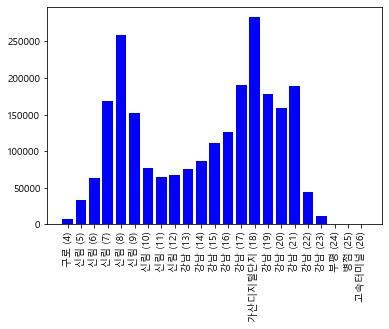

In [109]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.bar(range(len(mx_station)), mx, color = 'blue')
plt.xticks(range(len(mx_station)), mx_station, rotation = 90)
plt.show()